In [1]:
import sys
import torch
from torch import nn
sys.path.insert(0, '../../')
from lib import dlm

In [2]:
class StackedRNNScratch(dlm.Module):
    def __init__(self, num_inputs, num_hiddens, num_layers, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.rnns = nn.Sequential(*[dlm.RNNScratch(
            num_inputs if i==0 else num_hiddens, num_hiddens, sigma
        ) for i in range(num_layers)])

In [20]:
@dlm.add_to_class(StackedRNNScratch)
def forward(self, inputs, Hs=None):
    outputs = inputs
    if Hs is None: Hs = [None] * len(inputs)# inputs.shape[-1]
    for i in range(self.num_layers):
        outputs, Hs[i] = self.rnns[i](outputs, Hs[i])
    return outputs, Hs

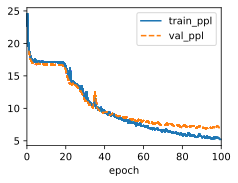

In [4]:
data = dlm.TimeMachine(batch_size=1024, num_steps=32)
rnn_block = StackedRNNScratch(num_inputs=len(data.vocab),
                             num_hiddens=32, num_layers=2)
model = dlm.RNNLMScratch(rnn_block, vocab_size=len(data.vocab), lr=2)
trainer = dlm.Trainer(max_epochs=100, gradient_clip_val=1, num_gpus=1)
trainer.fit(model, data)

In [21]:
model.predict('it has', 20, data.vocab, dlm.try_gpu())

IndexError: list index out of range